# cml1 - Immobilienrechner
## Explorative Datenanalyse

In [35]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas

In [36]:
df = pd.read_csv('../data/immo_data_202208_v2.csv', low_memory=False)
df.head()

,Unnamed: 0.1,Unnamed: 0,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,...,features,description_detailed,Floor space:,Number of floors:,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned
0,0,0,Biberstein,100 m²,NaN,NaN,On request,"5023 Biberstein, AG","3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...",DescriptionLuxuriöse Attika-Wohnung direkt an ...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
1,1,1,Biberstein,156 m²,222 m²,242 m²,On request,"Buhldenstrasse 8d5023 Biberstein, AG","4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...",DescriptionStilvolle Liegenschaft an ruhiger L...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
2,2,2,NaN,NaN,NaN,NaN,NaN,"5022 Rombach, AG","2.5 rooms, 93 m²«Moderne, lichtdurchflutete At...","detail_responsive#description_title2,5 Zimmerw...",...,NaN,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN
3,3,3,Biberstein,154 m²,370 m²,257 m²,On request,"Buhaldenstrasse 8A5023 Biberstein, AG","4.5 rooms, 154 m²«AgentSelly - Luxuriöses Eckh...",DescriptionDieses äusserst grosszügige Minergi...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
4,4,4,Küttigen,142 m²,NaN,NaN,On request,"5022 Rombach, AG","4.5 rooms, 142 m²«MIT GARTENSITZPLATZ UND VIEL...",DescriptionAus ehemals zwei Wohnungen wurde ei...,...,NaN,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN


### Spalten mergen
Es gibt viele Spalten, die das gleiche beinhalten. Diese werden nun zusammengefasst.

In [37]:
df['Availability'] = df['Availability'].fillna(df['detail_responsive#available_from'])

### Spalten entfernen
Wir haben alle Spalten gründlich analysiert und die Spalten entfernt, die für die weitere Analyse nicht relevant sind. Hier sind die Spalten, die wir entfernt haben und warum:



In [38]:
# Define a list of columns to be dropped
columns_to_drop = [
    'Unnamed: 0.1', 'Unnamed: 0', 'Municipality', 'Living space', 'Plot area', 'Floor space',
    'Availability', 'location', 'url', 'detail_responsive#available_from', 'Floor', 'Gemeinde',
    'Wohnfläche', 'Stockwerk', 'Nutzfläche', 'Verfügbarkeit', 'Grundstücksfläche', 'Commune',
    'Surface habitable', 'Surface du terrain', 'Surface utile', 'Disponibilité', 'Étage', 'Comune',
    'Superficie abitabile', 'Disponibilità', 'Piano', 'Superficie del terreno', 'Superficie utile',
    'address', 'link', 'type', 'Locality'
]

# Drop the columns from the DataFrame
df = df.drop(columns=columns_to_drop)

### Fehlende Daten

In [39]:
print("Anzahl fehlende Daten:", df.isna().sum().sum())

Anzahl fehlende Daten: 664257


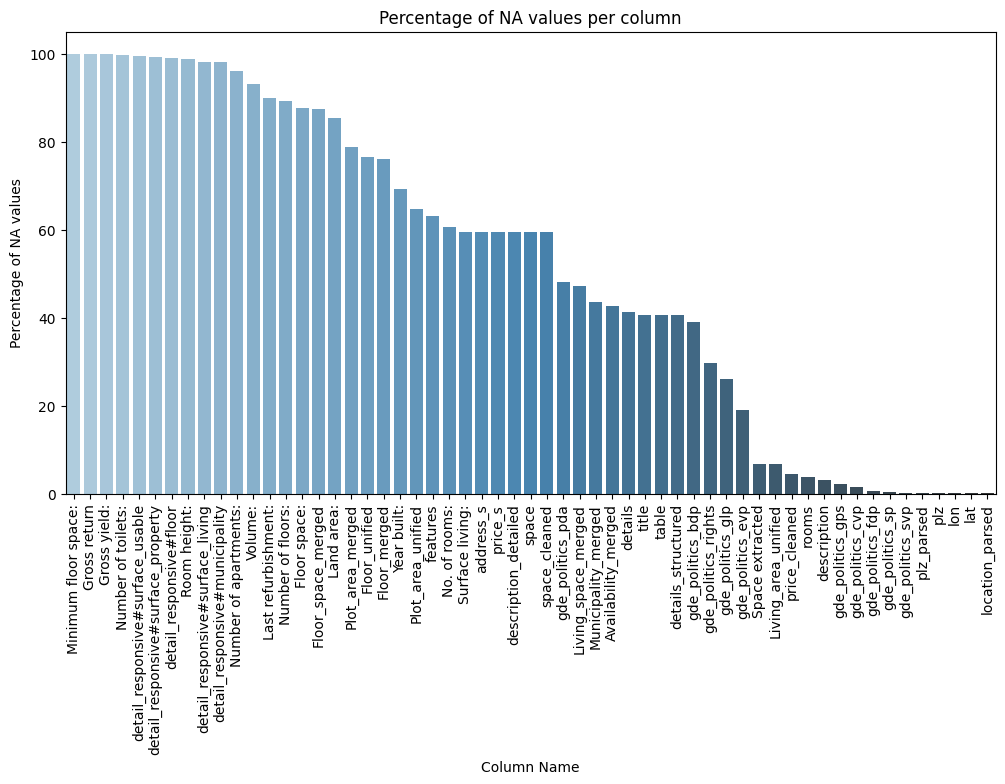

In [41]:
# Initialize an empty dictionary to store the column names and their corresponding NA percentages
na_percent_dict = {}

# Iterate over each column in the DataFrame
for col in df.columns:
    # Calculate the percentage of NA values in the column
    na_percent = round(df[col].isna().sum() / len(df[col]) * 100, 3)
    
    # If the percentage of NA values is greater than 0, add it to the dictionary
    if na_percent > 0.0:
        na_percent_dict[col] = na_percent

# Convert the dictionary to a Pandas Series for easier plotting
na_percent_series = pd.Series(na_percent_dict)

# Sort the series in descending order
na_percent_series = na_percent_series.sort_values(ascending=False)

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create a bar plot of the NA percentages
sns.barplot(x=na_percent_series.index, y=na_percent_series.values, palette='Blues_d')

# Set the title and labels of the plot
plt.title('Percentage of NA values per column')
plt.xlabel('Column Name')
plt.ylabel('Percentage of NA values')

plt.xticks(rotation=90)

plt.show()